## Object Detection

In this blog Object detection is discussed widely. 
For this Project we will be used ***YOLO(You Only Look Once) Dataset*** which is made by Darknet team.

### What is YOLO
YOLO (You Only Look Once) is a method / way to do object detection,it is a clever convolutional neural network (CNN) for doing object detection in real-time. It is the algorithm /strategy behind how the code is going to detect objects in the image. In this post we are going to use pre-trained YOLO Model to detect the objects right way.

### How YOLO Looks Like
1. Using joint training YOLO9000 was trained simultaneously on both the ImageNet classification dataset and COCO detection dataset. The result is a YOLO model, called YOLO9000, that can predict detections for object classes that don’t have labeled detection data. 
2. YOLO is trained on the COCO dataset.
3. The COCO dataset contains more than 80 labels pre-trained images.
4. Examples: Person, Cell-phone, Laptop, Animals Like cats, dogs, TV etc.

### Install YOLO
The COCO Dataset is present on Kaggle also the Darknet Team has released the Dataset. So it can be downloaded from thier website too.

***Step:1 Installing The Libraries***
1. For installing the libraries in Jupyter(Anaconda Environment) conda command is used.
2. To install numpy the command should be ***conda install numpy***
3. For installing OpenCV the command should be ***conda install -c conda-forge opencv***

***Step:2 Importing The Libraries***
1. After Installing we need to import the required libraries for this Project. 
2. OpenCV library is used for this priject. OpenCV Library Version need to be 3.4.2 or above. 
3. Also we have to import numpy for some array operations, and we will also going to import argparse, time and OS for parsing, calculation of time taken per frame and get file directory respectively

In [7]:
import numpy as np  
import argparse
import time
import cv2
import os

***Step:3 Define the file path***
After importing the Libraries we have to define the file path of our dataset. In the below code my system's file path is given

In [8]:
yolo="E:\\yolo-object-detection\\yolo-object-detection\\yolo-coco"

***Step:4 After giving the file path we have to parse the file. For that i have created a argument parser and assign the filepath into the arguments.***

In [9]:
args={}
args['yolo']=yolo

***Step:5***
After parsing the file we need to intialize the weightspath adn configpath present inside the YOLO Document
1. Weight file: it’s the trained model, the core of the algorithm to detect the objects.(***yolov3.weights***)
2. Cfg file: it’s the configuration file, where there are all the settings of the algorythm.(***yolov3.cfg***)
3. Name files: contains the name of the objects that the algorithm can detect.(***coco.names***)

In [10]:
weightsPath = os.path.sep.join([args["yolo"], "yolov3.weights"])
configPath = os.path.sep.join([args["yolo"], "yolov3.cfg"])

***Step:6 Create a deep neural network(dnn) Module***
OpenCV’s new deep neural network (dnn ) module contains two functions that can be used for preprocessing images and preparing them for classification via pre-trained deep learning models.
OpenCV’s dnn module is used to 
1. load a pre-trained network from disk.
2. make predictions on an input image. 
3. display the results, allowing you to build your own custom computer vision/deep learning pipeline for your particular project.

In the below code I have read the configpath and weightspath which has mentioned earlier through dnn. Then i make an empty list named classes, and then opened the ***coco.names*** which is also mentioned earlier, after opening i read the images and make  images labels/layer and put it into the list, after that i extract the name of the images through getlayer.names() and then connect it into the output_layers

In [11]:
net = cv2.dnn.readNet(configPath, weightsPath)
classes = []
with open("E:\\yolo-object-detection\\yolo-object-detection\\yolo-coco\\coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3)) #Colors of the boxes in RGB format

***Step:7 Read an image***
The Next Step is to read an image from the local device and resize the image based the your preferences. after that get the height and width of the image to get thier coordinates accordinly.

In [13]:
img = cv2.imread("images\\K.jpg")
img=cv2.resize(img,(500,600))
height, width, channels = img.shape

***Step:8 Make a blob from Image***
we can’t use right away the full image on the network, so first we need it to convert it to blob. Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

1. 320×320 it’s small so less accuracy but better speed
2. 609×609 it’s bigger so high accuracy and slow speed
3. 416×416 it’s in the middle and you get a bit of both.

Also we can see the time taken for it through time library which has imported earlier. 

In [14]:
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
start = time.time()
outs = net.forward(output_layers)
end = time.time()
# show timing information on YOLO
print("YOLO took {:.6f} seconds".format(end - start))

YOLO took 1.813582 seconds


These lists include:
1. boxes : The boxes to be biund around the object.
2. confidences : The confidence value that YOLO assigns to an object. Lower confidence values indicate that the object might not be what the network thinks it is. Here we took the confidence of 0.5 and threshold of 0.4
3. classIDs : The detected object’s class labels from which we will going to predict onto the new image.
4. Now it's time to integrate these lists with data from our YOLO layerOutputs

In [15]:
class_ids = []
confidences = []
boxes = []
# loop over each of the layer outputs
for out in outs:
    # loop over each of the detections
    for detection in out:
        # extract the class ID and confidence (i.e., probability) of
        # the current object present in the image which we have imported/read earlier.
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # we can filter the weak predictions by ensuring that the detected
        # probability is greater than the minimum probability(i.e 0.5)
        if confidence > 0.5:
            # Object detected
            # Determine the centers
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            # the empty list is now updated with the new list  bounding box coordinates, confidences,
            # and class IDs

***Last Step:***
There is a chance of overlapping when detecting multiple objects so we need to prepare a threshold which will not goin to allow the merging of boxes between two objects present in one image. For this we will going to apply non-maxima suppression to suppress weak, overlapping bounding. and the threshold ampunt here taken is 0.4

In [16]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

We have done with traing and preparing boxes and label he classes it's time to detect the objects from an image.
we used a for loop to  iterate over the boundary boxes and coordinates. After that we have drawn a rectangle and lable the image. For drawing a rectangle we used the coordinates of the image and draw them accordingly. after that we put text on the image with a font of(Hershey_Simplex) of font-size 0.5. after that we have print the coordinates as well

### First Image

In [17]:
while True:
    for i in idxs.flatten():
     # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

    # draw a bounding box rectangle and label on the image
        color = [int(c) for c in colors[class_ids[i]]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[class_ids[i]], confidences[i])
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
    cv2.imshow("Image", img)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cv2.destroyAllWindows()

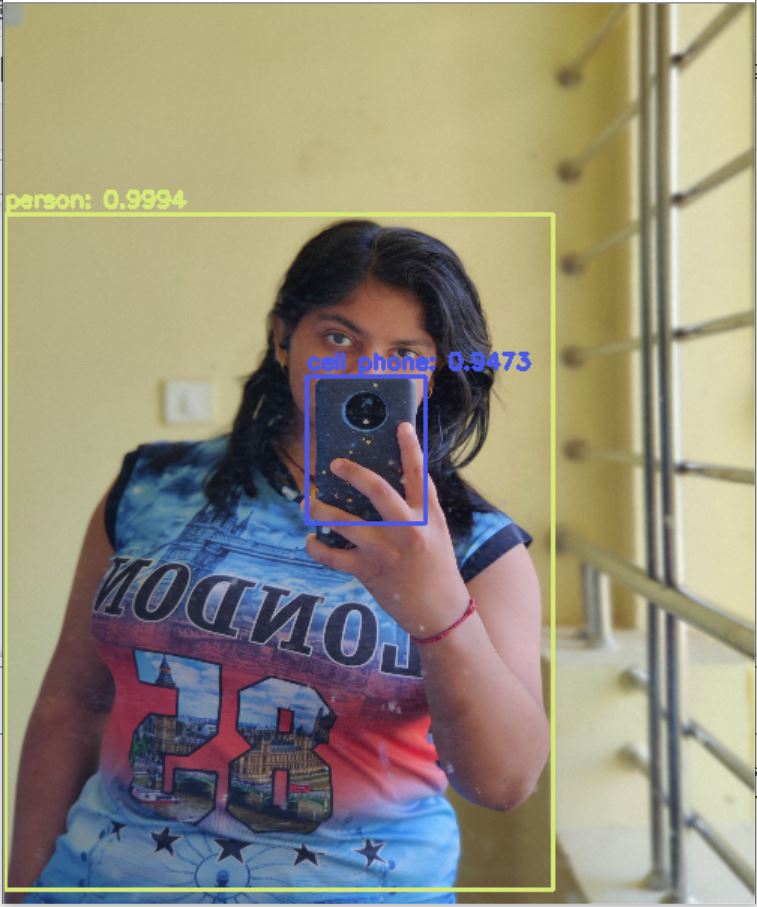

In [27]:
from IPython.display import Image
# Load image from local storage
Image(filename = "img1.jpg", width = 600, height = 500)

We can see the coordinates after running the loops.

In our first detection we saw that YOLO detects two images one is person and another one is cell-phone. YOLO detect the probalbility also and lable the person's Probability as 99% as well as the Cell-phone. So hence, Our model is working perfectly fine.

Let's Try with another image

In [18]:
image = cv2.imread("images\\soccer.jpg")
height, width, channels = image.shape

Acoordingly We have to create a blob for this image too.

In [19]:
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
start = time.time()
outs = net.forward(output_layers)
end = time.time()
# show timing information on YOLO
print("YOLO took {:.6f} seconds".format(end - start))

YOLO took 1.013721 seconds


This time YOLO took less seconds than previous one this might be due to the size of this image. Now let's create class_ids,bounding boxes and confidences on this image too.

In [20]:
class_ids = []
confidences = []
boxes = []
# loop over each of the layer outputs
for out in outs:
    # loop over each of the detections
    for detection in out:
        # extract the class ID and confidence (i.e., probability) of
        # the current object present in the image which we have imported/read earlier.
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # we can filter the weak predictions by ensuring that the detected
        # probability is greater than the minimum probability(i.e 0.5)
        if confidence > 0.5:
            # Object detected
            # Determine the centers
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            # the empty list is now updated with the new list  bounding box coordinates, confidences,
            # and class IDs

In [21]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

In [22]:
while True:
    for i in idxs.flatten():
     # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

    # draw a bounding box rectangle and label on the image
        color = [int(c) for c in colors[class_ids[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[class_ids[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
    cv2.imshow("Image", image)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cv2.destroyAllWindows()

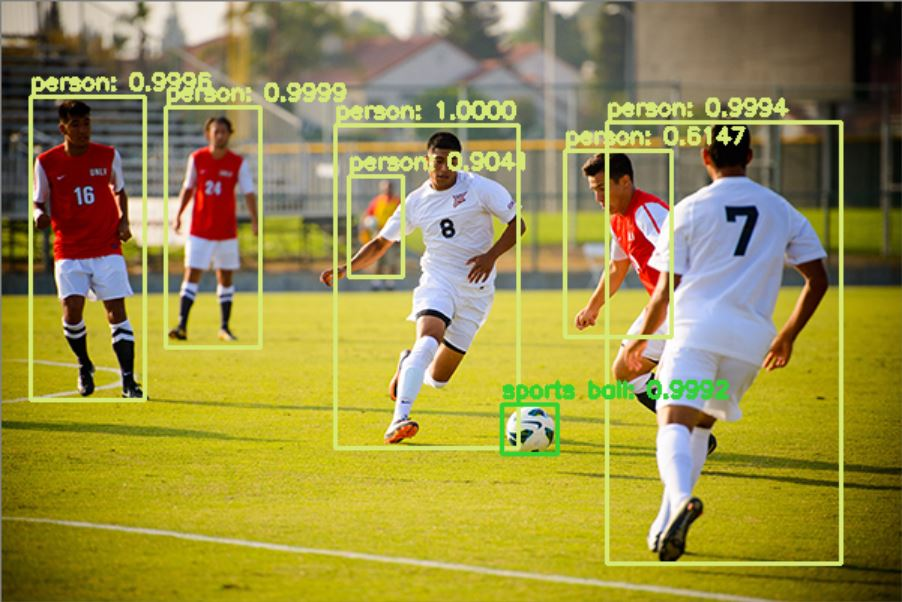

In [24]:
from IPython.display import Image
# Load image from local storage
Image(filename = "image.jpg", width = 600, height = 300)

This time YOLO detects all the persons present in the frame and return thier coordinates too.

YOLO detected all the person's with a very good probabilty and also  the soccer ball Too.

Let's Try a last Image

In [23]:
img_3 = cv2.imread("images\\cricket.jpg")
img_3 =cv2.resize(img_3,(600,600))
height, width, channels = img_3.shape

In [24]:
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(img_3, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
start = time.time()
outs = net.forward(output_layers)
end = time.time()
# show timing information on YOLO
print("YOLO took {:.6f} seconds".format(end - start))

YOLO took 1.043572 seconds


In [25]:
class_ids = []
confidences = []
boxes = []
# loop over each of the layer outputs
for out in outs:
    # loop over each of the detections
    for detection in out:
        # extract the class ID and confidence (i.e., probability) of
        # the current object present in the image which we have imported/read earlier.
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # we can filter the weak predictions by ensuring that the detected
        # probability is greater than the minimum probability(i.e 0.5)
        if confidence > 0.5:
            # Object detected
            # Determine the centers
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            # the empty list is now updated with the new list  bounding box coordinates, confidences,
            # and class IDs

In [26]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

In [27]:
while True:
    for i in idxs.flatten():
     # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

    # draw a bounding box rectangle and label on the image
        color = [int(c) for c in colors[class_ids[i]]]
        cv2.rectangle(img_3, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[class_ids[i]], confidences[i])
        cv2.putText(img_3, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
    cv2.imshow("Image", img_3)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cv2.destroyAllWindows()

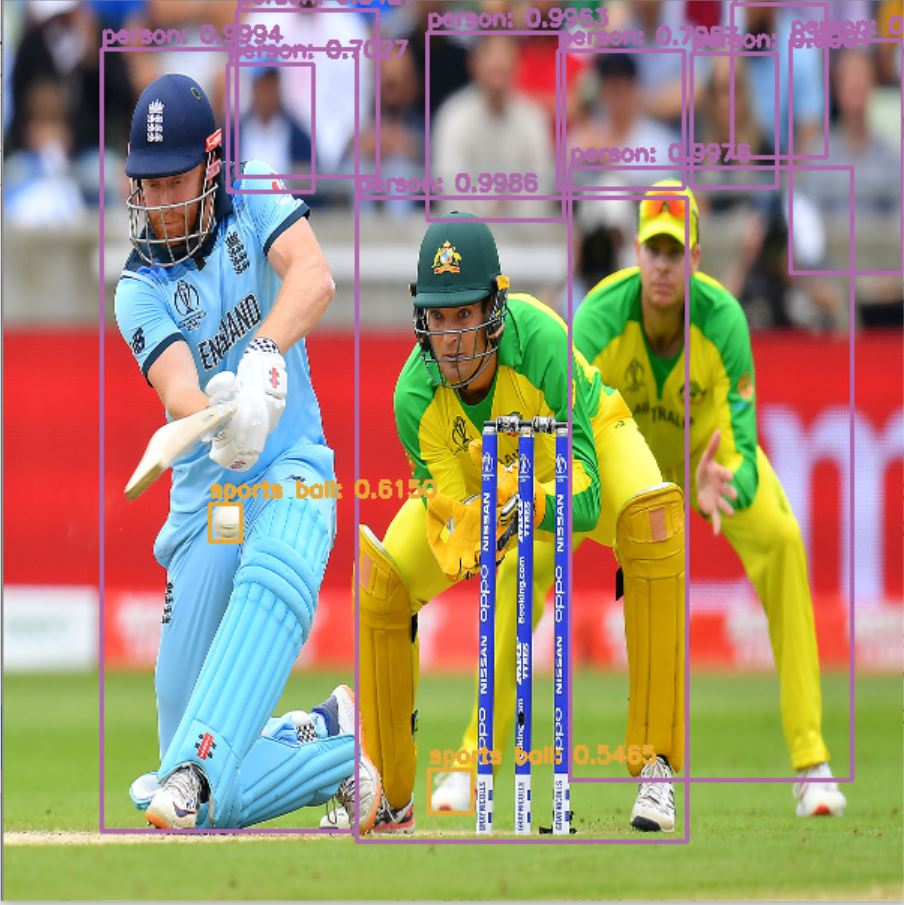

In [23]:
from IPython.display import Image
# Load image from local storage
Image(filename = "crii.jpg", width = 600, height = 300)

This Time YOLO Detects all the persons including the sports ball With a very Good Probabilty.

***Thanks To Adrian Rosebrock***